In [1]:
from os import listdir
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import ast # parse dictionaries from strings
import seaborn as sns
import altair as alt
from altair.expr import datum
from tqdm import tqdm_notebook as tqdm

%matplotlib notebook

STABLE_BUFFER = 10
                    # To ensure bad connectivity does not influence data, remove first few elements.

def keyF2(d):
    return d['test']
def keyforclientsort(respsorlogs):
    return respsorlogs[0], respsorlogs[-1]

import re
def interpret_name(s):
    p=0
    if('f' in s):
        p = 2
    reads = 0.0
    clients = 0
    mtbf = 0
    servers = 0
    service = ''
    test = ''
    
    a = re.split('-|_', s)
    
    reads = int(a[0+p][:-1])/100
    servers = int(a[1+p][:-1])
    clients = int(a[2+p][:-1])
    datasize = int(a[3+p][:-1])
    service = a[4+p]
    test = '_'.join(s.split('-')[0].split('_')[:-2])
    
    return reads, servers, clients, datasize, service, test

def servicebyindex(index, resu):
    tag = resu[  index  ]['test']
    _,_,_,_, service, _ = interpret_name(tag)
    return service

def testbyindex(index, resu):
    tag = resu[ index ]['test']
    _,_,_,_,_, test = interpret_name(tag)
    return test

def resultsbyindex(index, resu):
    res = np.array(  resu[  index  ]['resps'] )
    return res

def logsbyindex(index, resu):
    res = np.array(  resu[ index ]['logs'])
    return res

def failsbyindex(index, resu):
    res = np.array(  resu[ index ]['fail']  )
    return res

def separaterespsbyclients(a, removeStart=True):
    list_resps = a['resps']
    list_logs  = a['resps']
    list_resps.sort(key=keyforclientsort)
    list_logs.sort( key=keyforclientsort)
    
    numcli = list_resps[-1][0]
    tmpresps = [[] for _ in range(numcli+1)]
    tmplogs  = [[] for _ in range(numcli+1)]
    for d in list_resps:
        client_id = d[0]
        tmpresps[client_id].append(d)
    for d in list_logs:
        client_id = d[0]
        tmplogs[client_id].append(d)
    
    if removeStart:
        for i, clires in enumerate(tmpresps):
            tmpresps[i] = clires[STABLE_BUFFER:]
        for i, clilogs in enumerate(tmplogs):
            tmplogs[i] = clilogs[STABLE_BUFFER:]
    
    resps = []
    logs  = []
    
    for i, _ in enumerate(tmpresps):
        resps.extend(tmpresps[i])
        logs.extend( tmplogs[i] )
    
    res = a.copy()
    res['resps'] = resps
    res['logs' ] = logs
    
    return res

resultStrs = []
for res in listdir('fresults'):
    resultStrs.append( open('fresults/' + res) )

rawresults = [ast.literal_eval(res.read()) for res in resultStrs]

results = [separaterespsbyclients(res, removeStart=False) for res in rawresults]

results.sort(key=keyF2)

def extractresptimes(resps):
    response_times = [float(d[1]) for d in resps]
    return response_times
def extractlogs(logs):
    log_index = [d[2] for d in logs]
    return log_index
def extracttimestamps(resps):
    end_times = [float(d[4]) for d in resps]
    return end_times

compdata = [{servicebyindex(  3*i  , results) : (extractresptimes(resultsbyindex(  3*i  , results))), 
             servicebyindex(3*i + 1, results) : (extractresptimes(resultsbyindex(3*i + 1, results))),
             servicebyindex(3*i + 2, results) : (extractresptimes(resultsbyindex(3*i + 2, results))),
            'test' : testbyindex( 3*i , results),
            'fails' : {servicebyindex(3*i, results) : failsbyindex(3*i, results),
                       servicebyindex(3*i+2, results) : failsbyindex(3*i+2, results),
                      servicebyindex(3*i + 1, results) : failsbyindex(3*i+1, results)}}
             for i in range(len(results)//3)]
logdata =  [{servicebyindex(  3*i  , results) : (extractlogs(logsbyindex(  3*i  , results))), 
             servicebyindex(3*i + 1, results) : (extractlogs(logsbyindex(3*i + 1, results))),
             servicebyindex(3*i + 2, results) : (extractlogs(logsbyindex(3*i + 2, results))),
            'test' : testbyindex( 3*i , results),
            'fails' : {servicebyindex(3*i, results) : failsbyindex(3*i, results),
                       servicebyindex(3*i+2, results) : failsbyindex(3*i+2, results),
                      servicebyindex(3*i + 1, results) : failsbyindex(3*i+1, results)}}
             for i in range(len(results)//3)]
x_axes = [{servicebyindex(  3*i  , results): extracttimestamps((resultsbyindex(  3*i  , results))),
           servicebyindex(  3*i+1  , results): extracttimestamps((resultsbyindex(  3*i +1 , results))),
           servicebyindex(  3*i+2  , results): extracttimestamps((resultsbyindex(  3*i +2 , results))),
           'test' : testbyindex( 3*i , results)}
             for i in range(len(results)//3)]

compdata.sort(key=lambda d : d['test'])
logdata.sort(key=lambda d : d['test'])

In [2]:
lfcompdata = compdata
lflogdata = logdata

lfcompdata.sort(key=lambda d: d['test'][8:])
lflogdata.sort(key=lambda d: d['test'][8:])
x_axes.sort(key=lambda d: d['test'][8:])


In [48]:
i=0
files = []

('xes zookeeper: ', 51313, 'times zookeeper: ', 51313)
('xes etcd: ', 35236, 'times etcd: ', 35236)
('xes consul: ', 30541, 'times consul: ', 30541)
paper/figures/ff_3S_100R_cons.pdf
('xes zookeeper: ', 47783, 'times zookeeper: ', 47783)
('xes etcd: ', 34809, 'times etcd: ', 34809)
('xes consul: ', 29737, 'times consul: ', 29737)
paper/figures/lf_3S_100R_cons.pdf
('xes zookeeper: ', 52650, 'times zookeeper: ', 52650)
('xes etcd: ', 34510, 'times etcd: ', 34510)
('xes consul: ', 42065, 'times consul: ', 42065)
paper/figures/ff_3S_100R_cons.pdf
('xes zookeeper: ', 50462, 'times zookeeper: ', 50462)
('xes etcd: ', 33777, 'times etcd: ', 33777)
('xes consul: ', 41074, 'times consul: ', 41074)
paper/figures/lf_3S_100R_cons.pdf
('xes zookeeper: ', 53267, 'times zookeeper: ', 53267)
('xes etcd: ', 33421, 'times etcd: ', 33421)
('xes consul: ', 30851, 'times consul: ', 30851)
paper/figures/ff_5S_100R_cons.pdf
('xes zookeeper: ', 51255, 'times zookeeper: ', 51255)
('xes etcd: ', 32232, 'times e

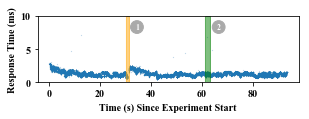

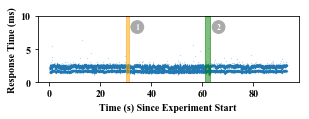

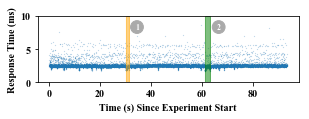

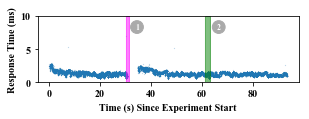

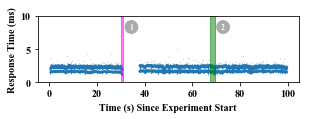

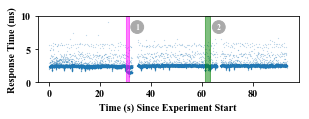

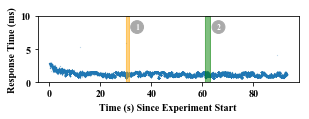

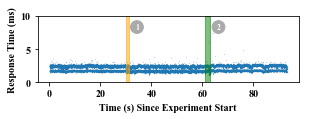

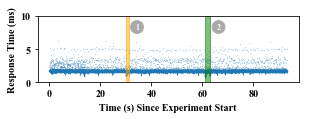

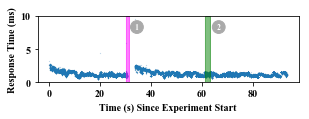

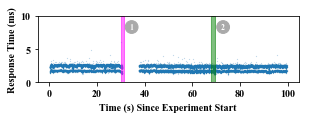

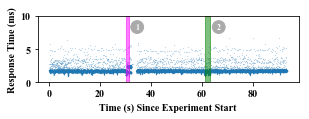

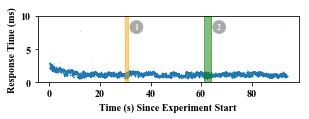

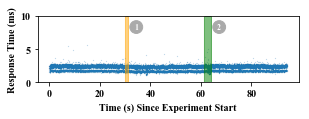

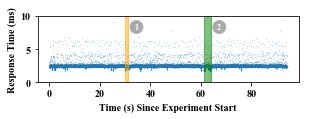

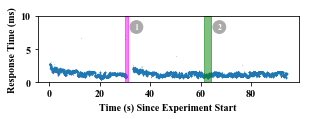

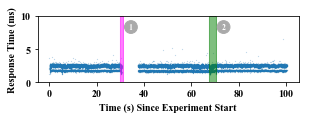

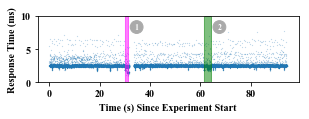

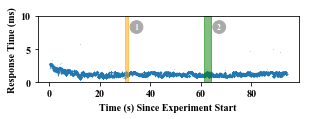

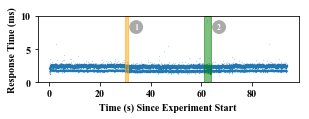

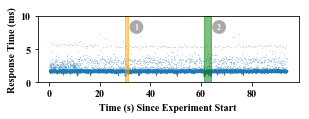

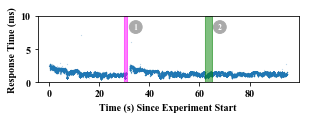

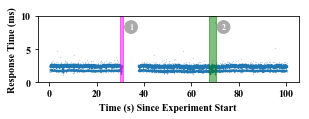

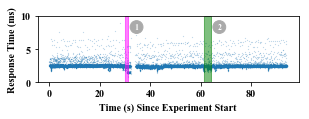

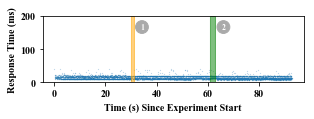

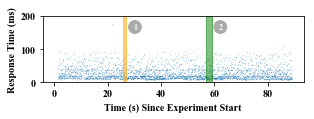

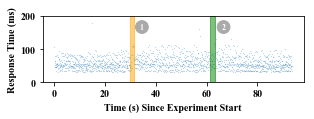

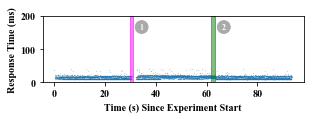

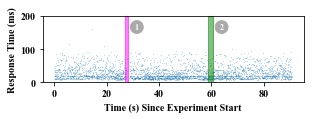

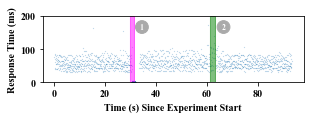

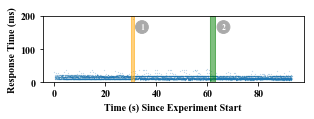

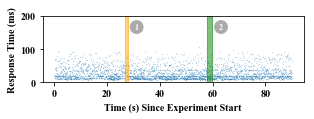

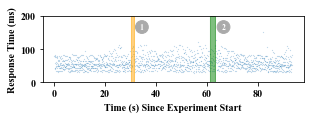

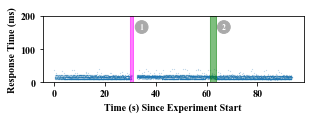

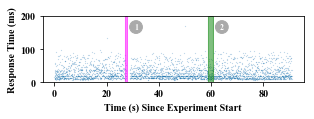

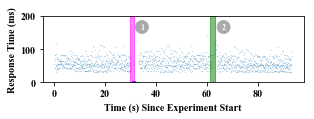

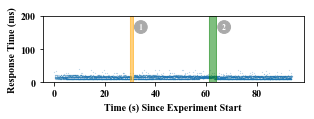

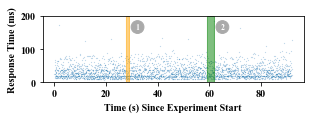

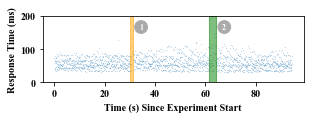

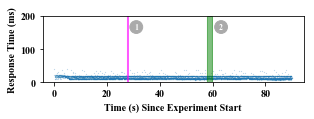

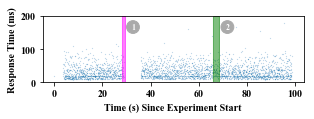

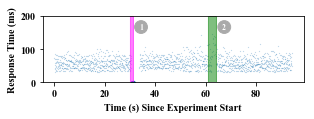

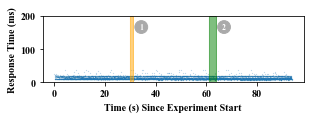

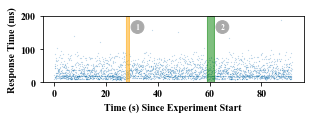

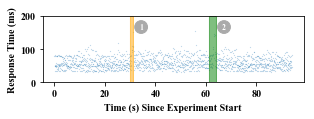

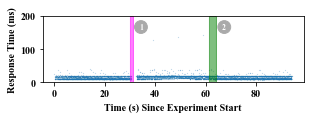

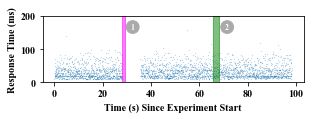

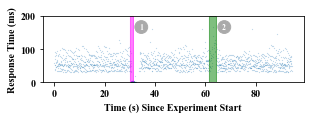

In [54]:
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman', 'font.weight': 'light'})

i=0
i = int(i)
while(i < len(lfcompdata)):
    r, s, c, _ , _ ,_ = interpret_name(lfcompdata[i]['test'] + '___')

    labely = 160 if r == 0 else 8


    fig, axes = plt.subplots(1,1, sharex=False, figsize=(5, 1.75))
    plt.subplots_adjust(bottom=0.35, left=0.175)
    axesrow = axes
    reses = np.array(lfcompdata[i]['zookeeper'])[np.array([float(p) for p in lfcompdata[i]['zookeeper']]) >= 0]
    xes = (np.array([float(p) for p in x_axes[i]['zookeeper']]))
    xes = xes[xes > 0]
    firstv = xes[0]
    xes = xes - np.array([xes[0] for _ in xes])
    print('xes zookeeper: ', len(xes), 'times zookeeper: ', len(reses))
    axesrow.scatter(x=xes, y=1000*np.array(reses), s=0.01)
    for j, fail in enumerate(lfcompdata[i]['fails']['zookeeper']):
        if(fail[0] == 'crash'):
            COL = 'orange'
            lead = False
        elif(fail[0] == 'leader_crash'):
            COL = 'magenta'
            lead = True
        else:
            COL = 'green'
        axesrow.axvline(x=(float(fail[1])-firstv), color=COL, lw=0.05)
        axesrow.axvline(x=(float(fail[2])-firstv), color=COL, lw=0.05)
        axesrow.axvspan(float(fail[1])-firstv, float(fail[2])-firstv, color=COL, alpha=0.5)
        axesrow.annotate(str(j+1),(float(fail[2])- float(firstv) + 2.5,labely), color='white', size=8, bbox={"boxstyle" : "circle", "color":"#AAAAAA"})
    if('_100R_' in lfcompdata[i]['test']):
        axesrow.set(ylim=(0,10.))
    else:
        axesrow.set(ylim=(0,200))
    axesrow.set_ylabel('Response Time (ms)')
    axesrow.set_xlabel('Time (s) Since Experiment Start')
    plt.savefig('paper/figures/' + ('lf' if lead else 'ff') + '_' + str(s) + 'S_' + str(int(100*r)) + 'R_zook.pdf')



    fig, axes = plt.subplots(1,1, sharex=False, figsize=(5, 1.75))
    plt.subplots_adjust(bottom=0.35, left=0.175)
    axesrow = axes
    reses = np.array(lfcompdata[i]['etcd'])[np.array([float(p) for p in lfcompdata[i]['etcd']]) >= 0]
    xes = (np.array([float(p) for p in x_axes[i]['etcd']]))
    xes = xes[xes > 0]
    firstv = xes[0]
    xes = xes - np.array([xes[0] for _ in xes])
    print('xes etcd: ', len(xes), 'times etcd: ', len(reses))
    axesrow.set(ylim=(0,200))
    axesrow.scatter(x=xes, y=1000*np.array(reses), s=0.01)
    for j, fail in enumerate(lfcompdata[int(i)]['fails']['etcd']):
        if(fail[0] == 'crash'):
            COL = 'orange'
            lead=False
        elif(fail[0] == 'leader_crash'):
            COL = 'magenta'
            lead=True
        else:
            COL = 'green'
        axesrow.axvline(x=(float(fail[1])-firstv), color=COL, lw=0.05)
        axesrow.axvline(x=(float(fail[2])-firstv), color=COL, lw=0.05)
        axesrow.axvspan(float(fail[1])-firstv, float(fail[2])-firstv, color=COL, alpha=0.5)
        axesrow.annotate(str(j+1),(float(fail[2])- float(firstv) + 2.5,labely), color='white', size=8, bbox={"boxstyle" : "circle", "color":"#AAAAAA"})
    if('_100R_' in lfcompdata[i]['test']):
        axesrow.set(ylim=(0,10.))
    else:
        axesrow.set(ylim=(0,200))
    axesrow.set_ylabel('Response Time (ms)')
    axesrow.set_xlabel('Time (s) Since Experiment Start')
    plt.savefig('paper/figures/' + ('lf' if lead else 'ff') + '_' + str(s) + 'S_' + str(int(100*r)) + 'R_etcd.pdf')



    fig, axes = plt.subplots(1,1, sharex=False, figsize=(5, 1.75))
    plt.subplots_adjust(bottom=0.35, left=0.175)
    axesrow = axes
    reses = np.array(lfcompdata[i]['consul'])[np.array([float(p) for p in lfcompdata[i]['consul']]) >= 0]
    xes = (np.array([float(p) for p in x_axes[i]['consul']]))
    xes = xes[xes > 0]
    firstv = xes[0]
    xes = xes - np.array([xes[0] for _ in xes])
    print('xes consul: ', len(xes), 'times consul: ', len(reses))
    axesrow.set(ylim=(0,200))
    axesrow.scatter(x=xes, y=1000*np.array(reses), s=0.01)
    for j, fail in enumerate(lfcompdata[i]['fails']['consul']):
        if(fail[0] == 'crash'):
            COL = 'orange'
            lead = False
        elif(fail[0] == 'leader_crash'):
            COL = 'magenta'
            lead = True
        else:
            COL = 'green'
        axesrow.axvline(x=(float(fail[1])-firstv), color=COL, lw=0.05)
        axesrow.axvline(x=(float(fail[2])-firstv), color=COL, lw=0.05)
        axesrow.axvspan(float(fail[1])-firstv, float(fail[2])-firstv, color=COL, alpha=0.5)
        axesrow.annotate(str(j+1),(float(fail[2])- float(firstv) + 2.5,labely), color='white', size=8, bbox={"boxstyle" : "circle", "color":"#AAAAAA"})   
    if('_100R_' in lfcompdata[i]['test']):
        axesrow.set(ylim=(0,10.))
    else:
        axesrow.set(ylim=(0,200))
    axesrow.set_ylabel('Response Time (ms)')
    axesrow.set_xlabel('Time (s) Since Experiment Start')
    plt.savefig('paper/figures/' + ('lf' if lead else 'ff') + '_' + str(s) + 'S_' + str(int(100*r)) + 'R_cons.pdf')



    i += 1
    print('paper/figures/' + ('lf' if lead else 'ff') + '_' + str(s) + 'S_' + str(int(100*r)) + 'R_cons.pdf')
    files.append('paper/figures/' + ('lf' if lead else 'ff') + '_' + str(s) + 'S_' + str(int(100*r)) + 'R_cons.pdf')
    i

In [15]:
i

1537351869.97

In [13]:
files = []

In [7]:
import scour

In [34]:
from os import rename, listdir, remove
from subprocess import call

In [38]:
for f in listdir('paper/figures'):
    if(".svg2" in f):
        remove('paper/figures/'+f[:-1])
        rename('paper/figures/' + f, 'paper/figures/' + f[:-1])

In [37]:
for f in listdir('paper/figures'):
    if('.svg' in f):
        call(['scour', '-i', 'paper/figures/' + f, '-o', 'paper/figures/' + f + str(2)])

In [39]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

In [42]:
for f in listdir('paper/figures'):
    if('.svg' in f):
        tmp = svg2rlg('paper/figures/' + f)
        renderPDF.drawToFile(tmp, 'paper/figures/' + f[:-4] + '.pdf')

In [40]:
for f in listdir('paper/figures'):
    if('.svg' in f):
        print(f[:-4])

exp
ff_3S_0R_cons
ff_3S_0R_etcd
ff_3S_0R_zook
ff_3S_100R_cons
ff_3S_100R_etcd
ff_3S_100R_zook
ff_5S_0R_cons
ff_5S_0R_etcd
ff_5S_0R_zook
ff_5S_100R_cons
ff_5S_100R_etcd
ff_5S_100R_zook
lf_3S_0R_cons
lf_3S_0R_etcd
lf_3S_0R_zook
lf_3S_100R_cons
lf_3S_100R_etcd
lf_3S_100R_zook
lf_5S_0R_cons
lf_5S_0R_etcd
lf_5S_0R_zook
lf_5S_100R_cons
lf_5S_100R_etcd
lf_5S_100R_zook
